In [ ]:
import pandas as pd
import numpy as np

lab_clean = pd.read_csv(r"U:\Estudis\B52_CORDELIA\Dades\PADRIS\testing.csv", sep = "|")

C:\Users\mhuertas\AppData\Local\Temp\ipykernel_17512\3999169792.py:3: DtypeWarning: Columns (1,7,8,9,11,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  lab_clean = pd.read_csv(r"U:\Estudis\B52_CORDELIA\Dades\PADRIS\testing.csv", sep = "|")


In [75]:
# -----------------------------------------
# ----- Step 1: Results with reportable limits -> flag implausible results

lab_clean.sample()

,codi_p,peticio_id,any,data,codi_prova,prova,resultat,unitat_mesura,ref_min,ref_max,clean_result,clean_unit,comentari,comentari_unitat,num_type
5293037,3530,42351063,2007,2007-04-23,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,1.2,mg/dL,0.1,0.5,1.2,mg/dl,NaN,done,n1


In [23]:
lab_clean.dtypes

codi_p               int64
peticio_id          object
any                  int64
data                object
codi_prova          object
prova               object
resultat            object
unitat_mesura       object
ref_min             object
ref_max             object
clean_result        object
clean_unit          object
comentari           object
comentari_unitat    object
num_type            object
dtype: object

In [80]:
# Testing dixon test
test_percentiles = lab_clean[(lab_clean['codi_prova'] == "Q45885") & (lab_clean['num_type'] == "n1") & (lab_clean['clean_unit'] == "mg/dl")]

test_percentiles['clean_result'] = test_percentiles['clean_result'].astype(float)

C:\Users\mhuertas\AppData\Local\Temp\ipykernel_17512\1031864702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_percentiles['clean_result'] = test_percentiles['clean_result'].astype(float)


In [81]:
test_percentiles

,codi_p,peticio_id,any,data,codi_prova,prova,resultat,unitat_mesura,ref_min,ref_max,clean_result,clean_unit,comentari,comentari_unitat,num_type
1200354,14260,64163412684,2019,2019-12-27,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"0,69",mg/dL,NaN,NaN,0.69,mg/dl,NaN,done,n1
1200463,1459,64163589147,2018,2018-04-20,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"19,9",mg/dL,NaN,NaN,19.90,mg/dl,NaN,done,n1
1201518,11131,64163880762,2022,2022-06-17,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"0,57",mg/dL,NaN,NaN,0.57,mg/dl,NaN,done,n1
1201593,4754,64163050346,2017,2017-09-25,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"1,2",mg/dL,NaN,NaN,1.20,mg/dl,NaN,done,n1
1201666,3824,66263747181,2021,2021-10-06,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"4,9",mg/dL,NaN,NaN,4.90,mg/dl,NaN,done,n1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6626321,11884,92208074750,2017,2017-09-22,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,",36",mg/dL,0,"0,5",0.36,mg/dl,NaN,done,n1
6626375,11251,110305547032,2017,2017-11-03,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,",4",mg/dL,0,"0,5",0.40,mg/dl,NaN,done,n1
6626405,11937,11605592300,2017,2017-01-16,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,",19",mg/dL,0,"0,5",0.19,mg/dl,NaN,done,n1
6626474,2272,72708059087,2017,2017-07-27,Q45885,PROTEÏNA C REACTIVA (PCR) (SÈRUM); C.MASSA,"7,97",mg/dL,0,"0,5",7.97,mg/dl,NaN,done,n1


In [82]:
data = test_percentiles[(test_percentiles['clean_result'] >= np.percentile(test_percentiles['clean_result'], 0.01)) & (test_percentiles['clean_result'] <= np.percentile(test_percentiles['clean_result'], 99.9))]['clean_result'].values

In [85]:
np.percentile(data, 99)

34.54699999999997

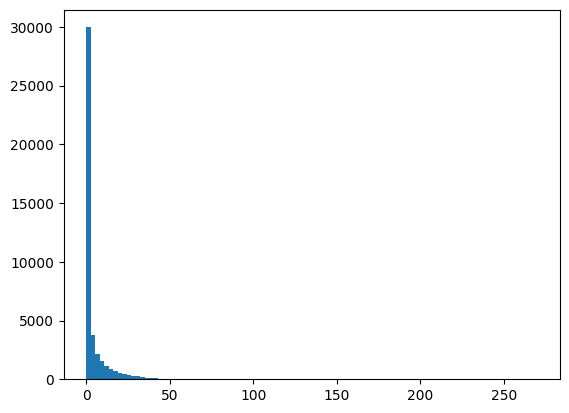

In [87]:
import matplotlib.pyplot as plt

plt.hist(test_percentiles['clean_result'].values, bins = 100)
plt.show()

In [89]:
from scipy import stats
stats.normaltest(data)


NormaltestResult(statistic=25353.51011322522, pvalue=0.0)

In [92]:
lab_clean[['codi_prova', 'clean_unit']].drop_duplicates().nunique()


codi_prova    2639
clean_unit     354
dtype: int64